In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/road_accident_dataset.csv')


### 1- Data Understanding


In [5]:
df.head()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1.0,...,2.0,58.625720,7412.752760,Wet,Weather,4.0,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3.0,...,1.0,58.041380,4458.628820,Snow-covered,Mechanical Failure,3.0,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4.0,...,4.0,42.374452,9856.915064,Wet,Speeding,4.0,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2.0,...,3.0,48.554014,4958.646267,Icy,Distracted Driving,3.0,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1.0,...,4.0,18.318250,3843.191463,Icy,Distracted Driving,8.0,15605.293921,13584.060759,South America,3883.645634


In [ ]:
df.tail()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
131995,Germany,2023,June,Wednesday,Evening,Rural,Main Road,Foggy,351.740871,4,...,0,37.405598,1907.208566,Icy,Speeding,3,18640.125887,50695.311876,Asia,173.307333
131996,Brazil,2023,January,Tuesday,Morning,Rural,Main Road,Foggy,95.563567,1,...,4,17.054490,2706.253339,Dry,Drunk Driving,2,48161.129965,20260.167191,Asia,4375.443810
131997,Russia,2021,March,Wednesday,Afternoon,Urban,Street,Clear,74.112102,3,...,3,55.558876,6860.161645,Dry,Speeding,9,24696.058692,8132.133502,Asia,4196.244517
131998,Australia,2002,May,Tuesday,Morning,Urban,Street,Rainy,276.612565,3,...,2,19.100498,1523.299088,Wet,Speeding,8,13486.716680,17607.573072,Europe,2911.904030
131999,USA,2022,November,Tuesday,Morning,Urban,Street,Windy,253.531380,3,...,4,28.037108,7662.853082,Snow-covered,Speeding,6,3240.358544,27765.168982,Asia,2949.568694


### 2- Check for Datatypes

In [6]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
Dtypes,object,int64,object,object,object,object,object,object,float64,float64,...,float64,float64,float64,object,object,float64,float64,float64,object,float64
Num_Uniqe,10,25,12,7,4,2,3,5,65138,4,...,5,65138,65138,4,5,10,65138,65138,5,65138


### 3- Check for Null Values

In [7]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
Null_sum,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ratio,0.0,0.0,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015


### 4- Handle Outliers

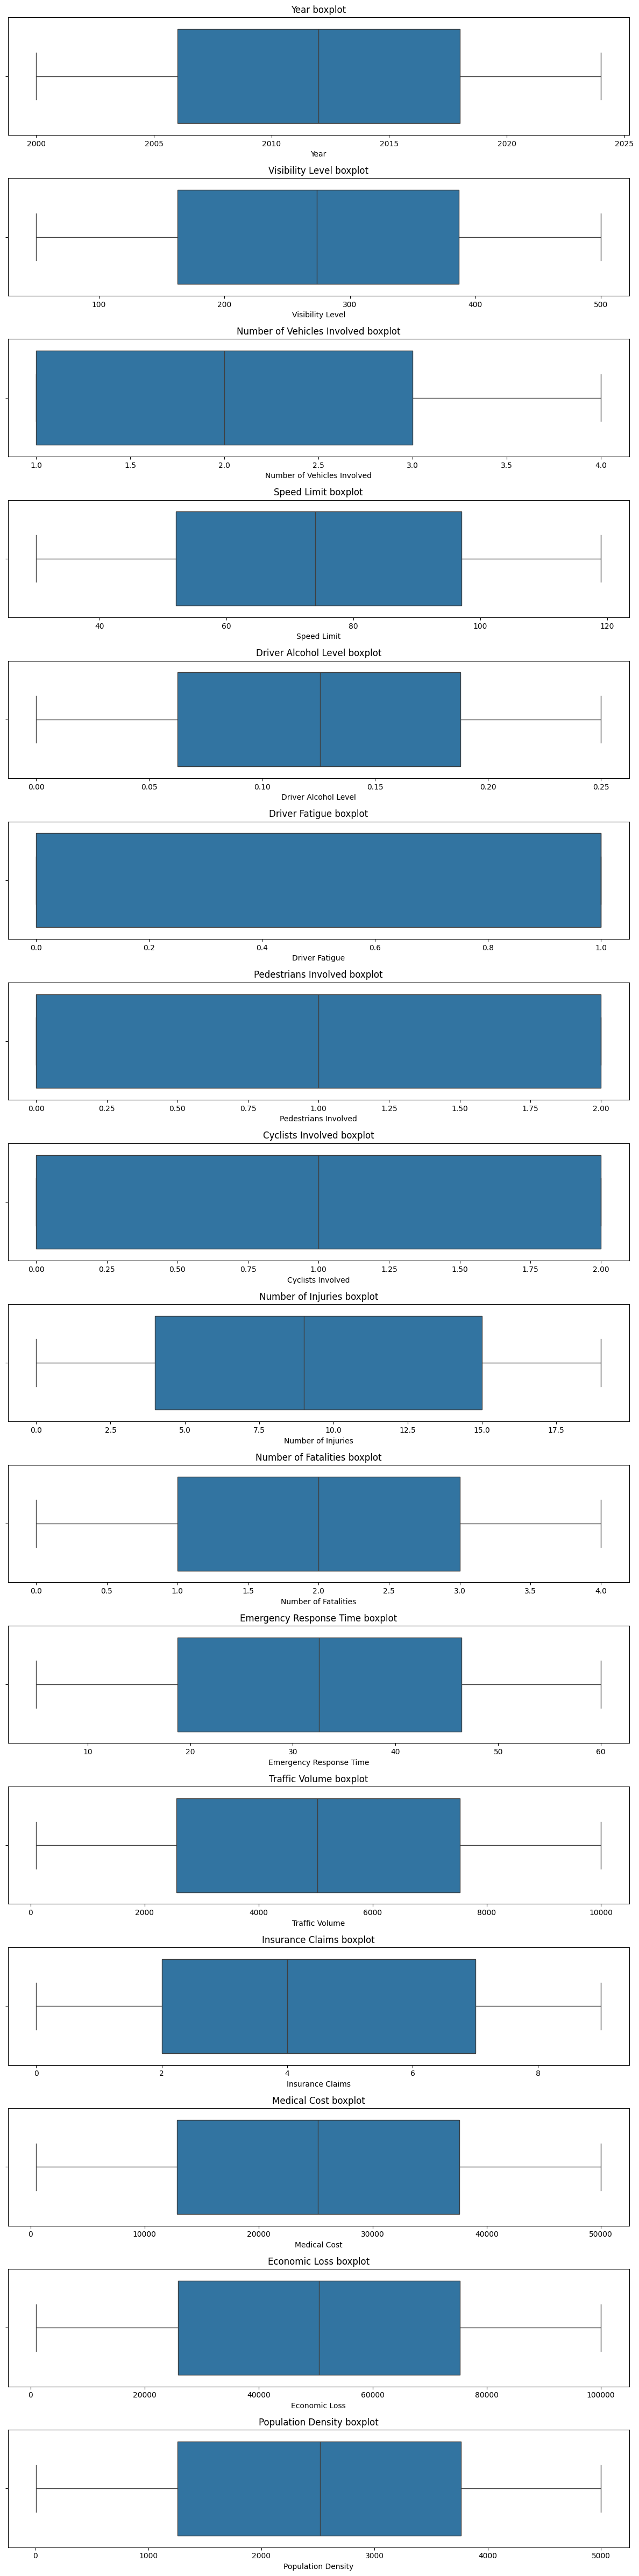

In [8]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(12, 3 * len(num_cols)))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")

plt.tight_layout()
plt.show()


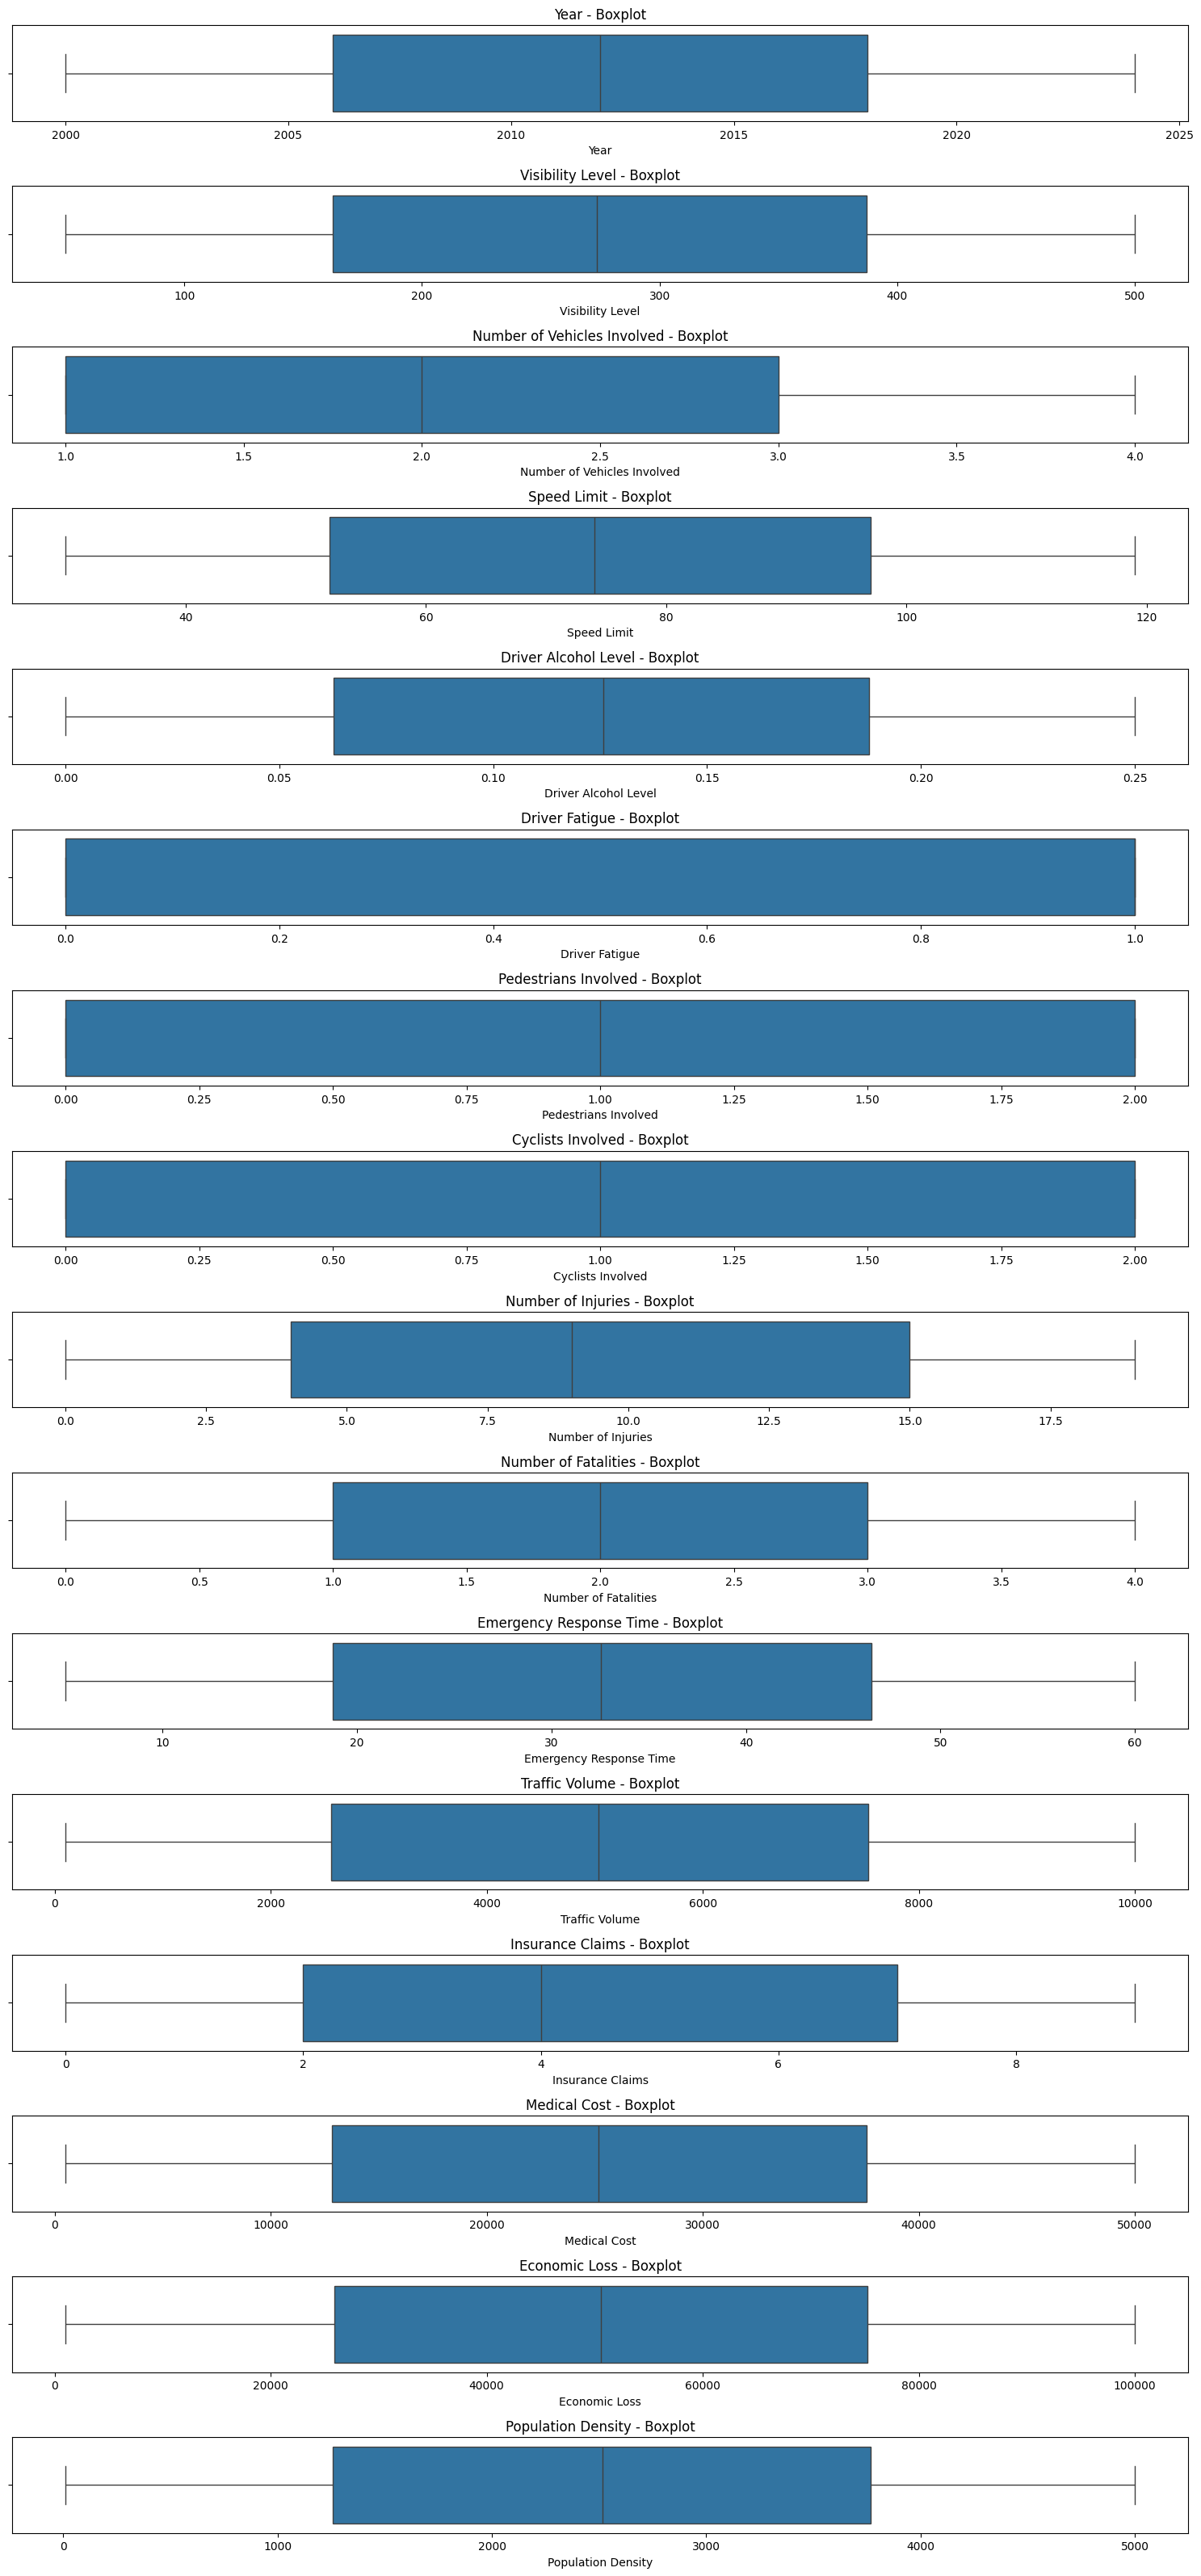

In [9]:
num_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, len(num_cols) * 2))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f"{col} - Boxplot")
plt.tight_layout()
plt.show()


##5-Check For Dublicates

In [10]:
df.duplicated().sum()

np.int64(0)

##6-Make Sure Data is Standardized(no typos)

In [11]:
cat_cols = [
    'Country',
    'Year',
    'Month',
    'Day of Week',
    'Time of Day',
    'Urban/Rural',
    'Road Type',
    'Weather Conditions',
    'Visibility Level',
    'Road Condition',
    'Accident Cause',
    'Region'
]
for col in cat_cols:
    print(f"\n--- Value Counts for: {col} ---")
    print(df[col].value_counts())




--- Value Counts for: Country ---
Country
Australia    6634
Germany      6612
Canada       6571
China        6535
UK           6529
USA          6529
India        6529
Brazil       6487
Japan        6391
Russia       6322
Name: count, dtype: int64

--- Value Counts for: Year ---
Year
2002    2711
2012    2679
2007    2662
2015    2661
2008    2651
2009    2648
2003    2641
2014    2633
2001    2632
2017    2617
2005    2615
2011    2612
2020    2597
2006    2591
2010    2591
2016    2586
2000    2574
2023    2566
2024    2565
2019    2562
2022    2562
2018    2556
2013    2553
2004    2544
2021    2530
Name: count, dtype: int64

--- Value Counts for: Month ---
Month
May          5547
July         5514
February     5450
March        5450
June         5436
October      5429
January      5427
September    5415
November     5405
April        5402
December     5343
August       5320
Name: count, dtype: int64

--- Value Counts for: Day of Week ---
Day of Week
Tuesday      9434
Saturday     

#6- Inconsistency between the Country and Region columns

In [12]:
country_to_region = {
    'USA': 'North America',
    'UK': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Russia': 'Asia',
    'Australia': 'Australia',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia'
}
df['Region'] = df['Country'].map(country_to_region)
print("Updated Country to Region Frequency Table:\n")
print(pd.crosstab(df['Country'], df['Region'], margins=True, margins_name='Total'))

Updated Country to Region Frequency Table:

Region      Asia  Australia  Europe  North America  South America  Total
Country                                                                 
Australia      0       6634       0              0              0   6634
Brazil         0          0       0              0           6487   6487
Canada         0          0       0           6571              0   6571
China       6535          0       0              0              0   6535
Germany        0          0    6612              0              0   6612
India       6529          0       0              0              0   6529
Japan       6391          0       0              0              0   6391
Russia      6322          0       0              0              0   6322
UK             0          0    6529              0              0   6529
USA            0          0       0           6529              0   6529
Total      25777       6634   13141          13100           6487  65139


In [17]:
df.to_csv('cleaned_data.csv', index=False)

In [18]:
from google.colab import files
files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>